# EDA - Exploratory Data Analysis

Un EDA es un tratamiento estadístico al que se someten las muestras recogidas durante un proceso de investigación en cualquier campo científico. Los principales objetivos en este estudio son:
- Maximizar el conocimiento de un conjunto de datos
- Descubrir su estructura
- Extraer variables importantes
- Detectar valores atípicos y anomalías (outliers)

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
data_path = Path('./data')

%matplotlib inline

## 1. Extracción de datos

In [7]:
data = pd.read_csv(data_path / 'winequality_own.csv')
print(data.shape)
data.head()

(1599, 12)


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,NaN,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Variables y tipos de datos

Veamos cada una de las variables de nuestro conjunto de datos:

**Variables predictoras**

1 - fixed acidity: 

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

**Variable objetivo**

12 - quality (valores entre 0 and 10)

In [3]:
data.dtypes

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

Este problema se puede enfocar de diferentes maneras:

- 1. Problema de clasificación multiclase.
- 2. Problema de regresión. Suponemos un vino con calidad 4.5 aquel que tiene un valor entre 4 y 5
- 3. Convertir el problema en una clasificación binaria. Todos aquellos vinos con calidad >= 7 serán considerados vinos "buenos". Aquellos con calidad menor, serán considerados vinos "malos"

En nuestro caso, vamos a realizar el análisis como si estuvieramos ante un problema de clasificación binaria, aunque las conclusiones no cambiarían mucho. Ahora, vamos a crear nuestra nueva variable objetivo.

In [4]:
data.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1539.000000,1599.000000,1542.000000,1599.000000,1514.000000,1599.000000,1545.00000,1549.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.271144,2.538806,0.087401,15.874922,46.661162,0.996747,3.31134,0.658896,10.422983,5.636023
std,1.741096,0.179060,0.195013,1.409928,0.046734,10.460157,32.843504,0.001887,0.15471,0.171362,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.74000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.21000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.31000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.40000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.01000,2.000000,14.900000,8.000000


In [8]:
data['quality'] = [0 if q <7 else 1 for q in data['quality']]
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

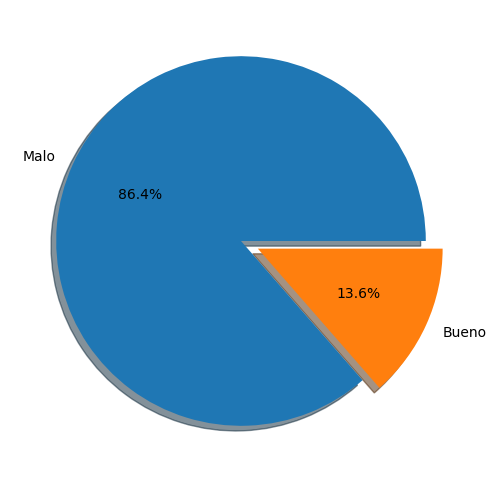

In [9]:
porc = data['quality'].value_counts(normalize = True)

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(porc, labels=['Malo', 'Bueno'], autopct='%1.1f%%', shadow = True, explode = [0, 0.1]);

Nos estamos enfrentando a un problema desbalanceado.

## 3. Datos missings

In [7]:
data.isnull().sum()

fixedacidity           0
volatileacidity        0
citricacid            60
residualsugar          0
chlorides             57
freesulfurdioxide      0
totalsulfurdioxide    85
density                0
pH                    54
sulphates             50
alcohol                0
quality                0
dtype: int64

In [12]:
_ = data.isnull().sum() / data.shape[0] * 100
_[_ > 0]

citricacid            3.752345
chlorides             3.564728
totalsulfurdioxide    5.315822
pH                    3.377111
sulphates             3.126954
dtype: float64

Si analizamos los valores missings en términos porcentuales podemos observar como NO representan un valor alto. Ahora, podríamos actuar de dos formas:

- Dejarlos tal y como están por ahora, y continuar nuestro análisis con estos missings. Podríamos tener problemas a la hora de realizar algunos gráficos.
- Imputarlos por algún valor numérico. Solucionamos el valor missing pero estamos modificando (o inventándonos algunos datos)

En nuestro caso, vamos a imputar los valores missings. Nosotros lo haremos por la media de cada variable, pero debemos saber que existen numerosas técnicas para este propósito.

Podemos implemenarlo variable a variable...

In [10]:
data['citricacid'].fillna(data['citricacid'].mean(), inplace = True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace = True)
data['totalsulfurdioxide'].fillna(data['totalsulfurdioxide'].mean(), inplace = True)
data['pH'].fillna(data['pH'].mean(), inplace = True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace = True)

O programarlo en un bucle...

In [13]:
cols_to_impute = _[_>0].index
cols_to_impute

Index(['citricacid', 'chlorides', 'totalsulfurdioxide', 'pH', 'sulphates'], dtype='object')

In [14]:
for col in cols_to_impute:
    data[col].fillna(data[col].mean(), inplace = True)

In [15]:
data.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

## 4. Distribución de variables

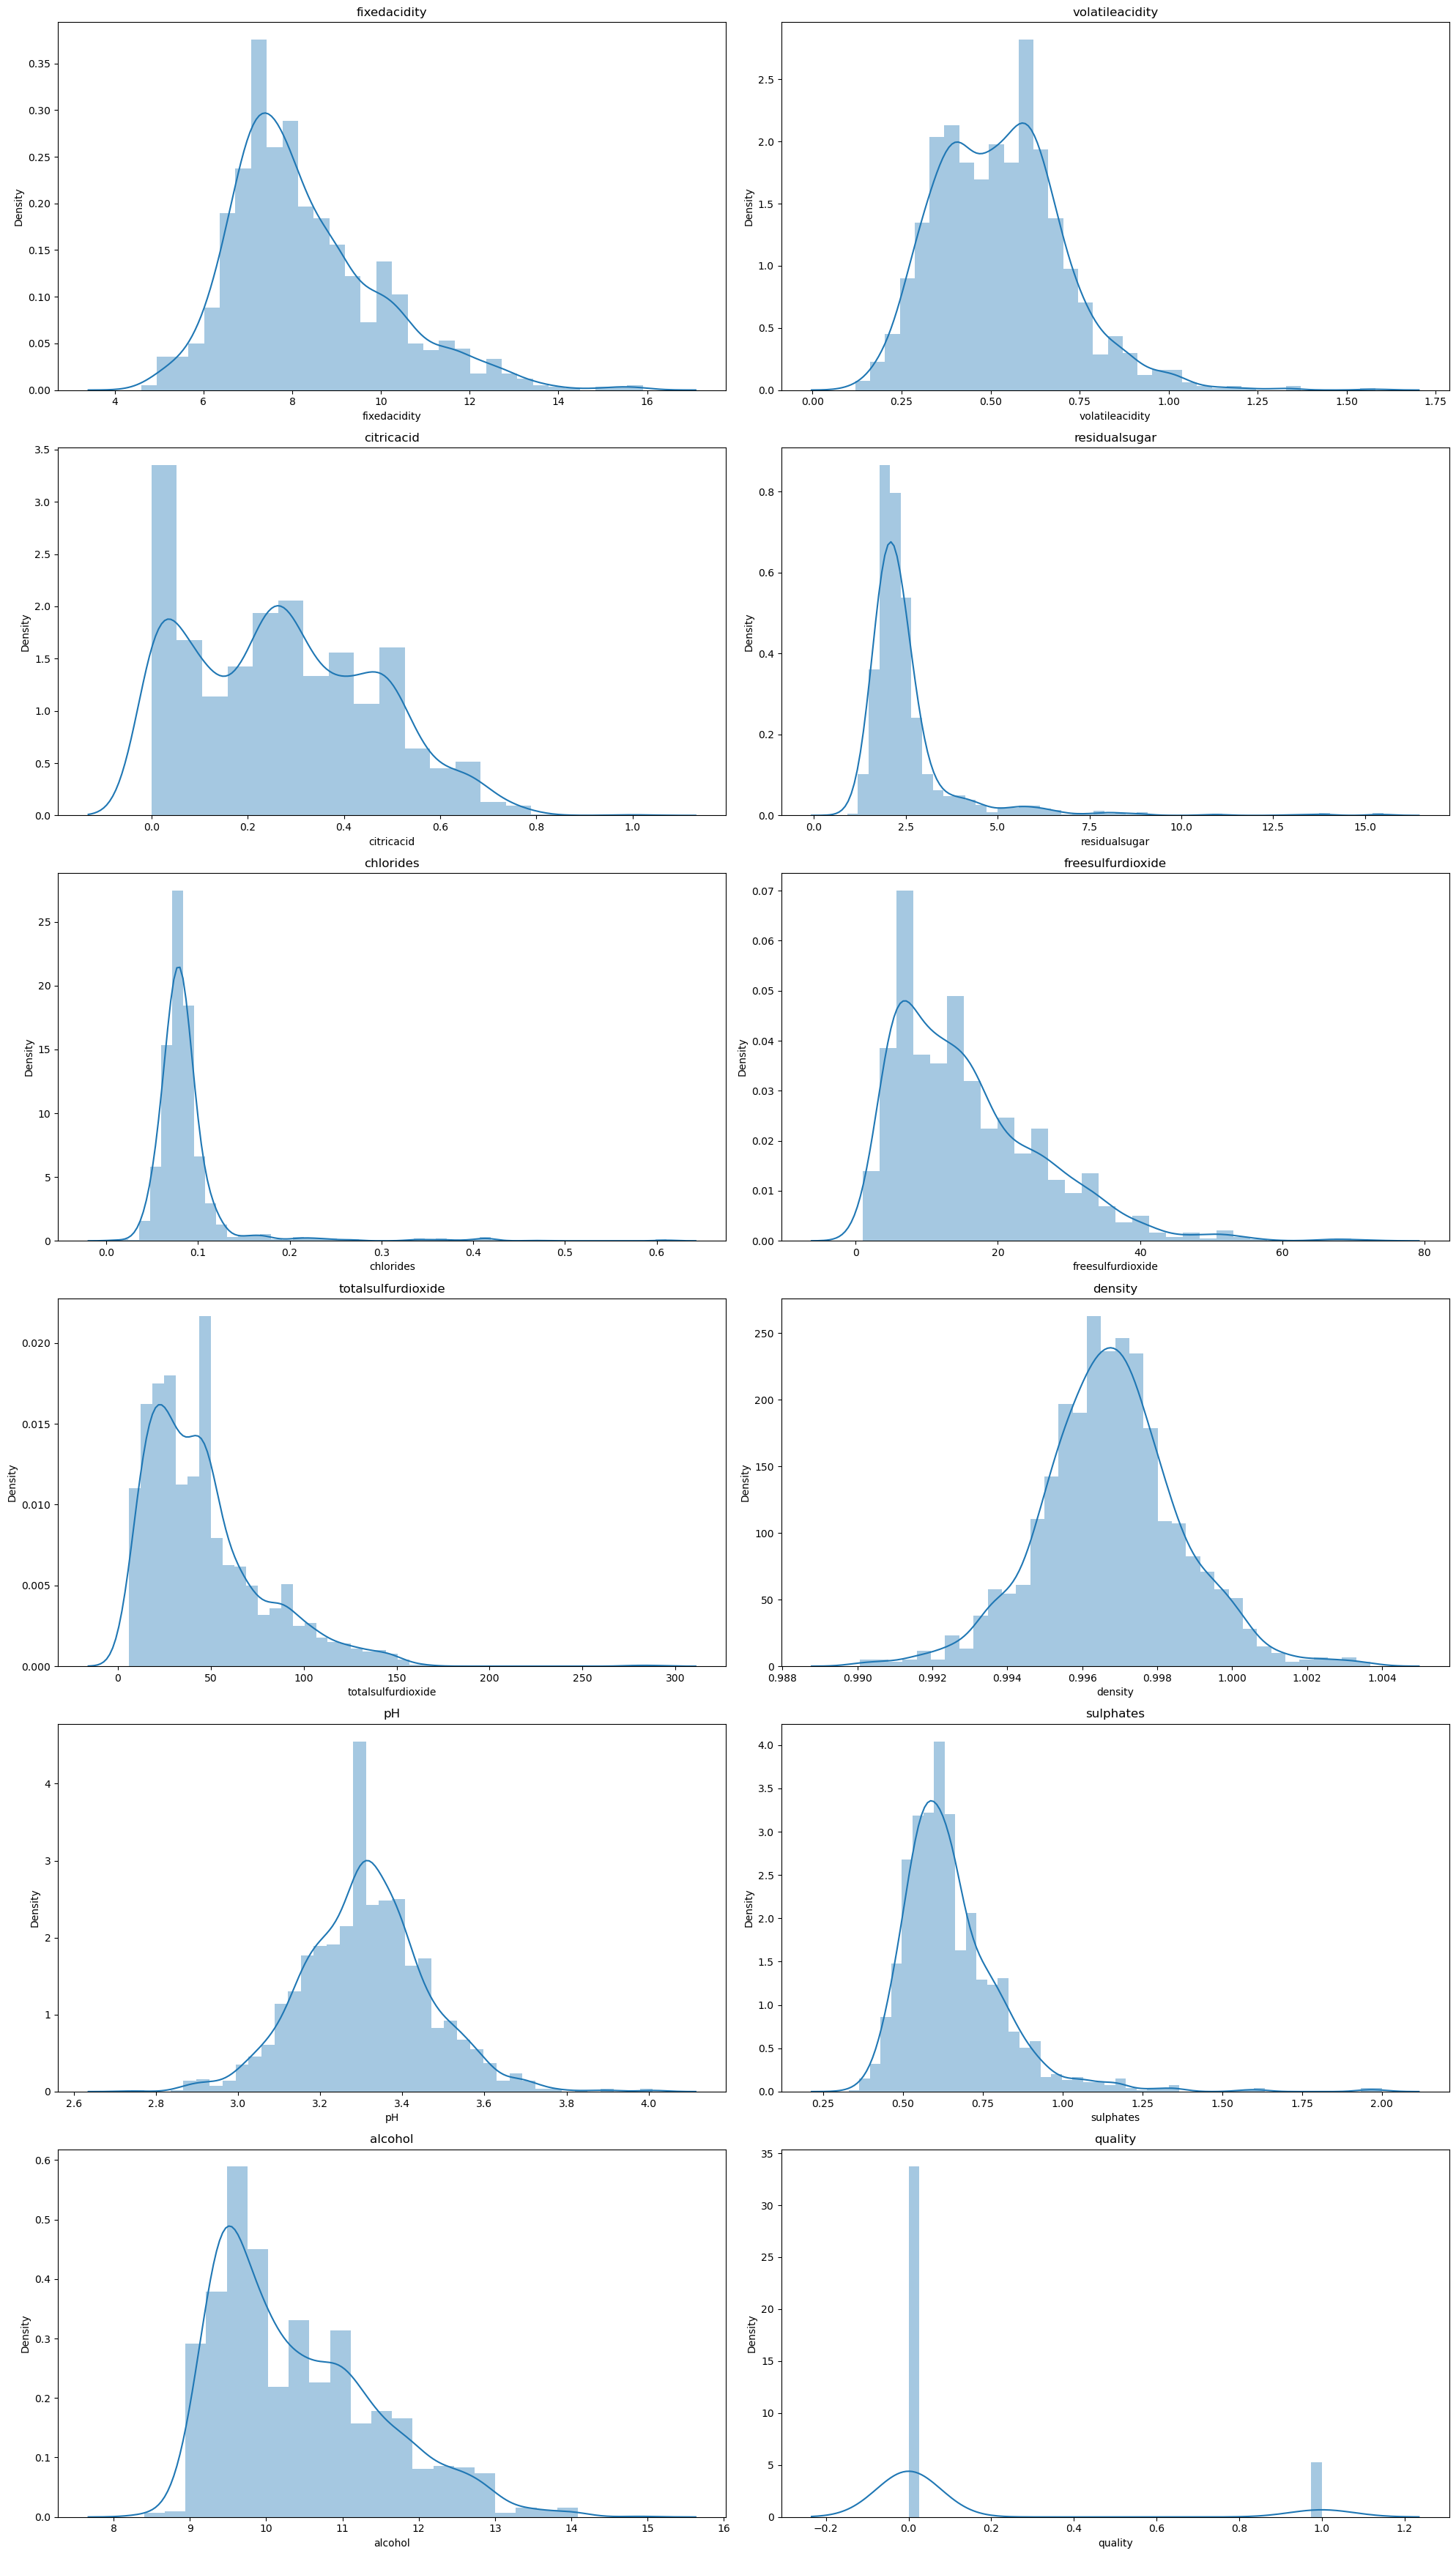

In [17]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
    
    ax[i,j].set_title(c)
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

Vamos a medir ahora el *skewness* y la *kurtosis* de cada variable.

- El skewness es una medida de simetría. Un dataset simétrico, posee un skewness igual a 0. Una distribución normal posee un skewness igual 0.
- La kurtosis es una medida de las colas de la distribución. Cuanto mayor peso tengan las colas, mayor es la kurtosis. Una kurtosis igual a cero se aproximaría a una distribución normal.

In [18]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------fixedacidity------
Skewness: 0.982751
Kurtosis: 1.132143
------volatileacidity------
Skewness: 0.671593
Kurtosis: 1.225542
------citricacid------
Skewness: 0.330718
Kurtosis: -0.698193
------residualsugar------
Skewness: 4.540655
Kurtosis: 28.617595
------chlorides------
Skewness: 5.778518
Kurtosis: 43.628176
------freesulfurdioxide------
Skewness: 1.250567
Kurtosis: 2.023562
------totalsulfurdioxide------
Skewness: 1.562631
Kurtosis: 4.329415
------density------
Skewness: 0.071288
Kurtosis: 0.934079
------pH------
Skewness: 0.201399
Kurtosis: 0.947990
------sulphates------
Skewness: 2.452750
Kurtosis: 11.967317
------alcohol------
Skewness: 0.860829
Kurtosis: 0.200029
------quality------
Skewness: 2.129363
Kurtosis: 2.537360


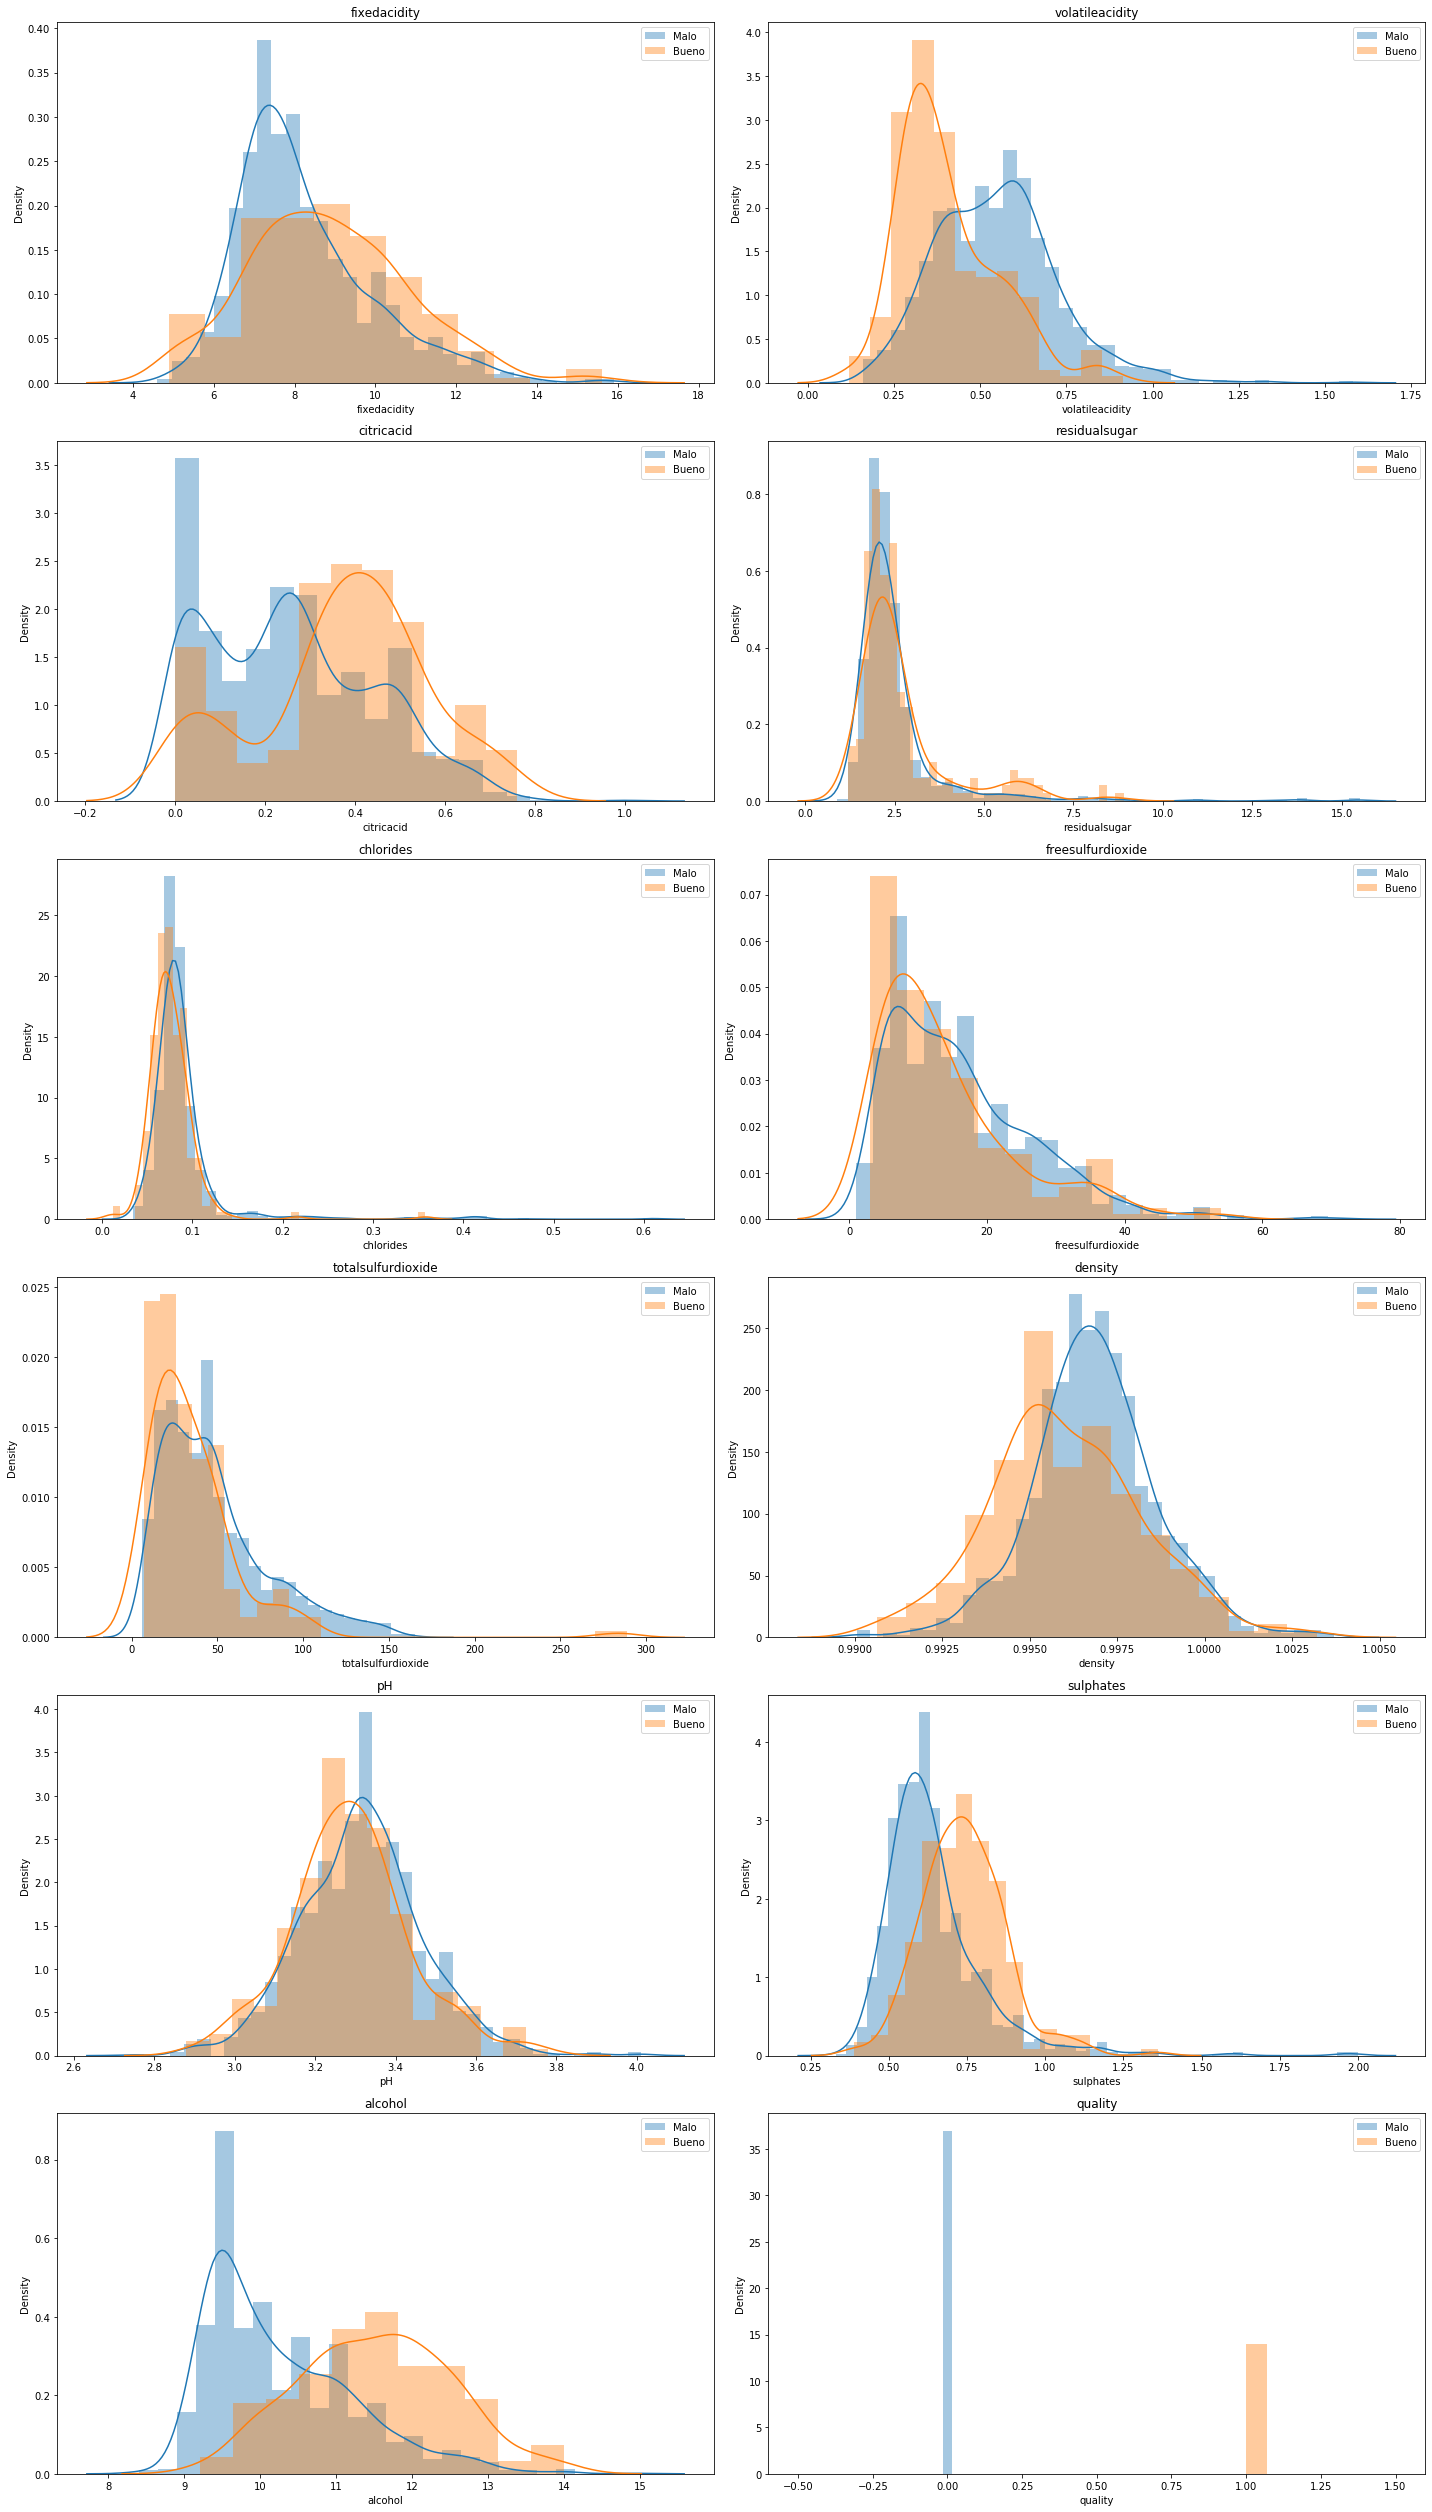

In [15]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.distplot(data.query('quality == 0')[c], hist = True, kde = True, ax = ax[i,j], label = 'Malo')
    sns.distplot(data.query('quality == 1')[c], hist = True, kde = True, ax = ax[i,j], label = 'Bueno')

    ax[i,j].set_title(c)
    ax[i,j].legend()
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

Aquí podemos comenzar a sacar algunas conclusiones en cuanto a variables:

- Los vinos buenos tienen menos acidez.
- Los vinos buenos tienen un poco más de ácido cítrico.
- Los vinos buenos tienen un poco más de menos densidad.
- Los vinos buenos tienen un poco más de sulfatos.
- Los vinos buenos tienen más alcohol.
- La variable Ph va a tener poca importancia

## 5. Valores anómalos (outliers)

Vamos a analizar si tenemos valores anómalos, u outliers. Los outliers por definición son observaciones con valores extraños, bien excesivamente altos, o excesivamente bajos. Estos valores afectan muchos en algoritmos paramétricos, y poco en modelos basados en árboles.

Para descubrir esos valores anómalos vamos a usar un gráfico de cajas. Lo haremos separando por vinos 'buenos' y 'malos'.

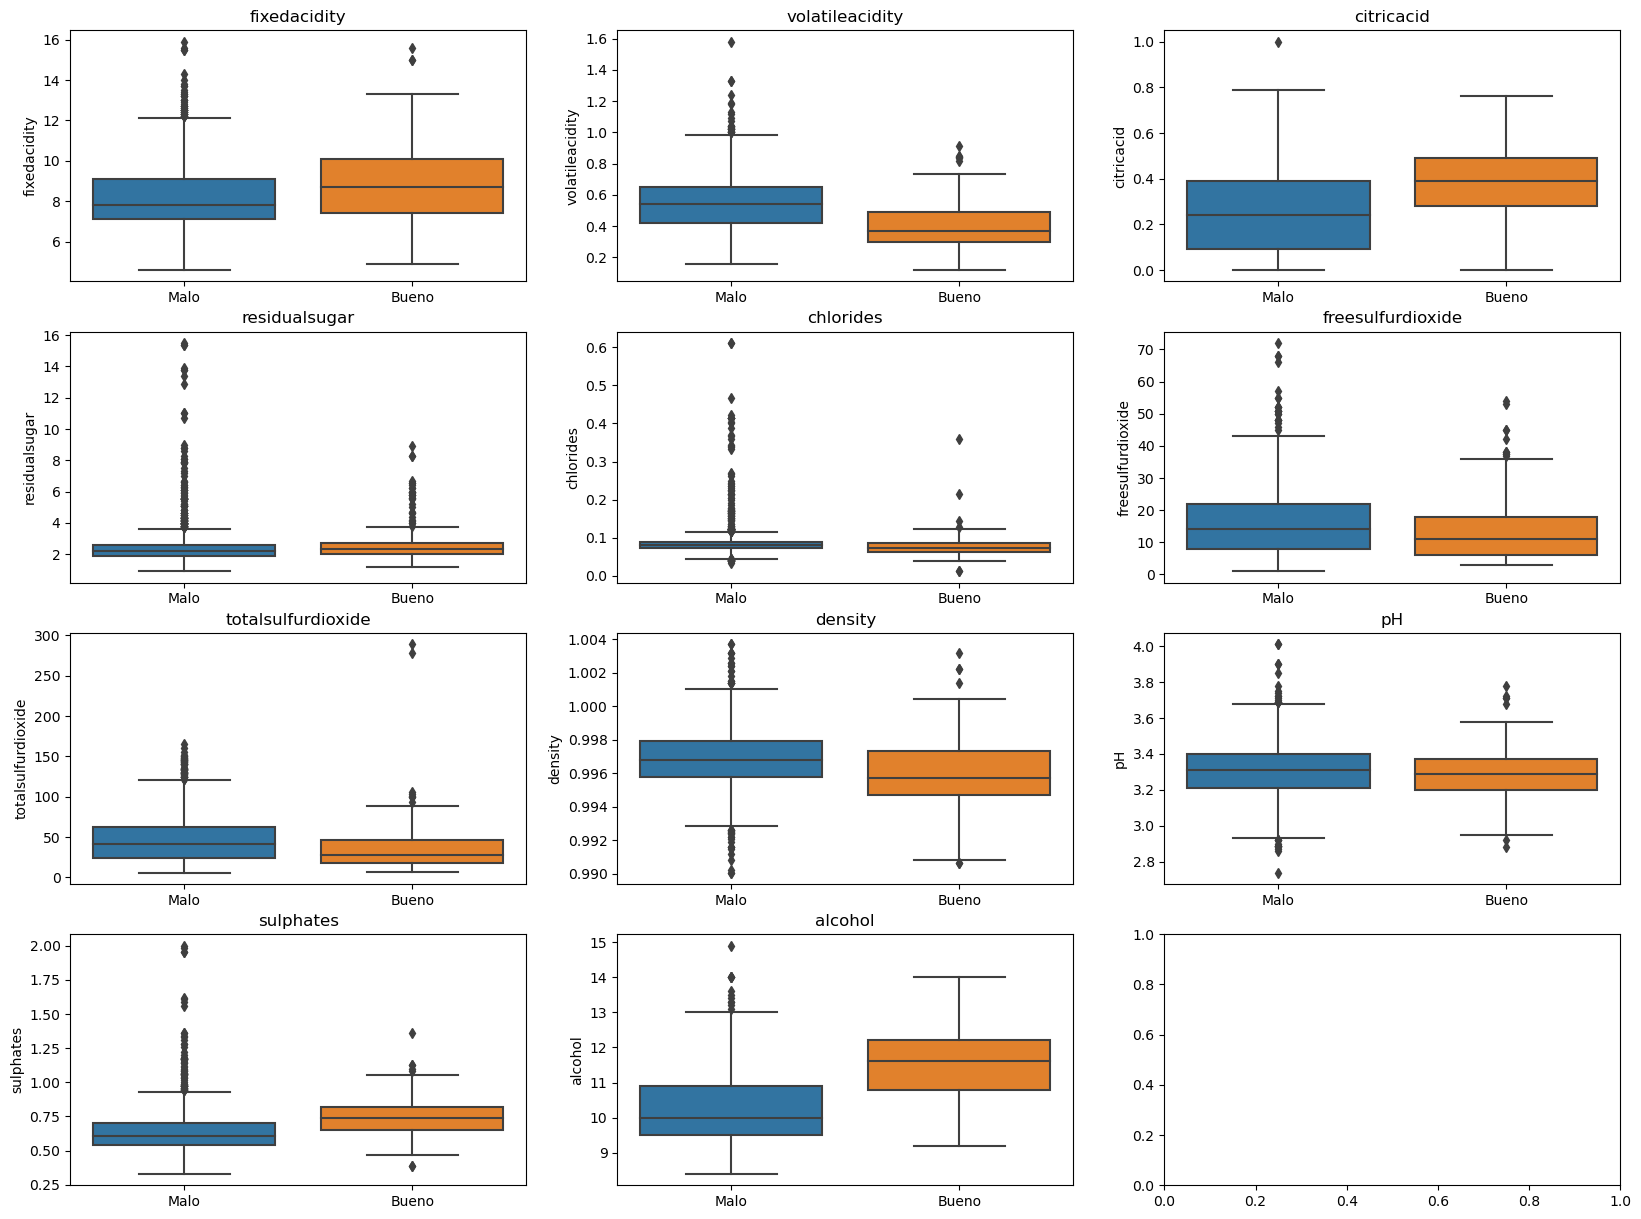

In [19]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols = 3, figsize = (20, 15))

i,j = 0,0
for c in cols.delete(-1):
    sns.boxplot(x = 'quality', y = c, data = data, ax = ax[i,j], )
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('')
    ax[i,j].set_xticklabels(np.array(['Malo', 'Bueno']))
    
    j+=1
    if j==3:
        j=0
        i+=1


Con estos gráficos también podemos hacernos una idea de las variables que describen nuestra variable objetivo. Si nos fijamos por ejemplo en la variable 'alcohol', podemos sacar como conclusión que los vinos bueno suelen tener más alcohol, y que aquellos vinos malos con muchos alcohol no dejan de ser unas observaciones extrañas, o outliers.

## 6. Correlación entre variables

Con la correlación de variables vamos a poder sacar varias conclusiones:

1. Variables con una alta correlación nos están dando aproximadamente la misma, por lo que podríamos desprendernos de una de ellas.
2. Variables con una alta correlación con el target serán variables importantes en nuestro modelo

<Axes: >

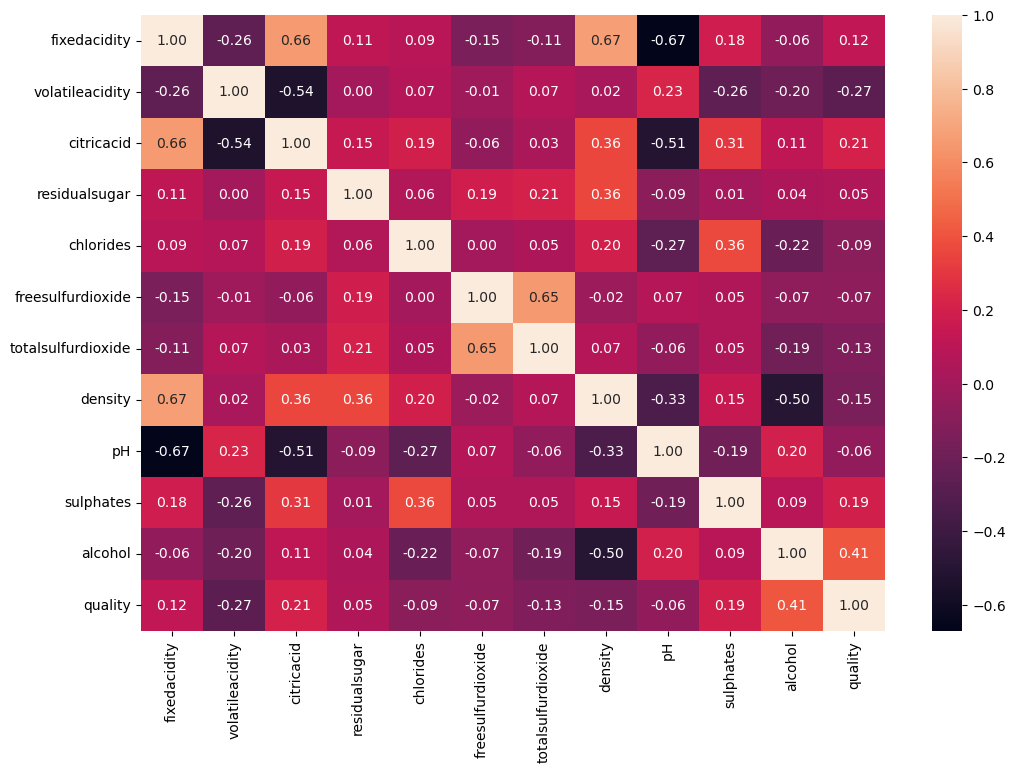

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

- Una correlación positiva &rarr; Cuanto mayor sea una variable, mayor será la otra.
- Una correlación negativa &rarr; Cuanto mayor sea una variable, menor será la otra.


Si nos centramos en nuestro target podemos ver que las variables con la cual tiene una mayor correlación son:

- Volatileacidity &rarr; -0.27
- Citricacid &rarr; 0.21
- Sulphates &rarr; 0.19
- Alcohol &rarr; 0.41

Simplemente con esta matriz de correlación, me atrevería a decir que la variable más importante en nuestro modelo va a ser **alcohol**.

También podemos ver correlaciones altas entre otras variables:

- Fixedacidity tiene una correlación de 0.67, 0.66 y -0.67 con las variables density, citricacid y pH respectivamente.
- Volatileacidity tiene una correlación de -0.54 con citricacid

<Axes: >

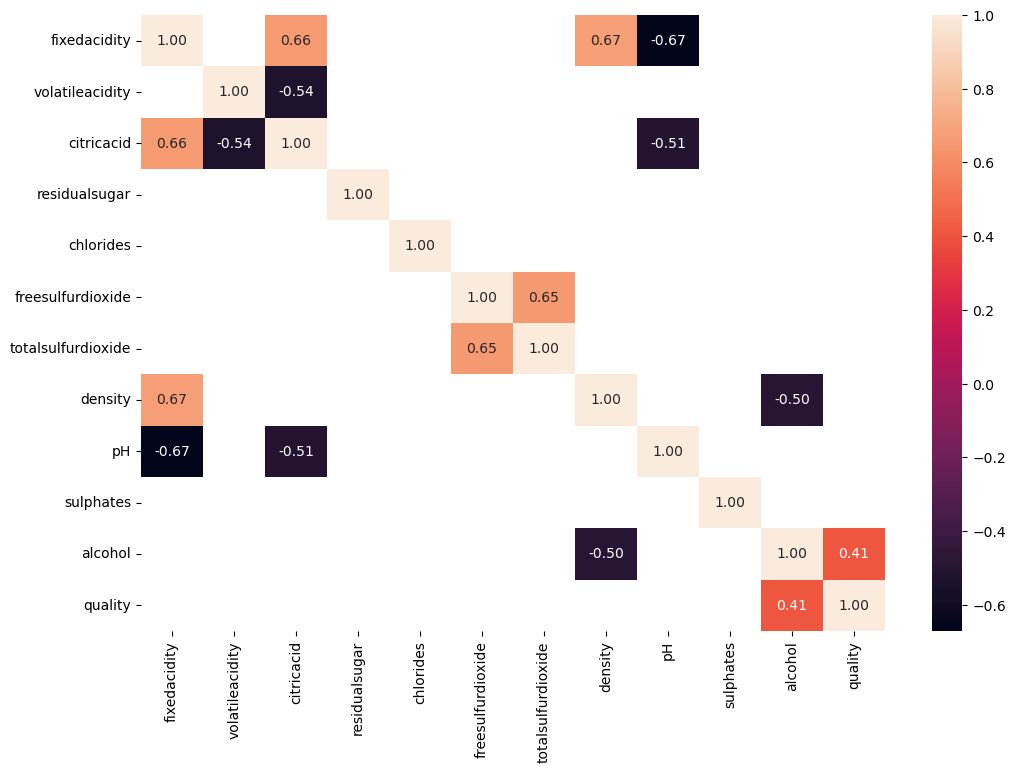

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr()[(data.corr() > 0.4) | (data.corr() < -0.4)], annot=True, fmt = '.2f')

Veamos algunos gráficos de regresión entre estas variables

In [22]:
import matplotlib.pyplot as plt

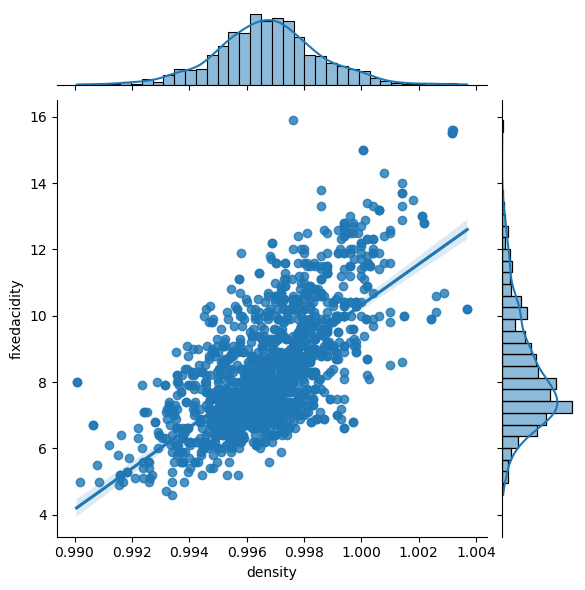

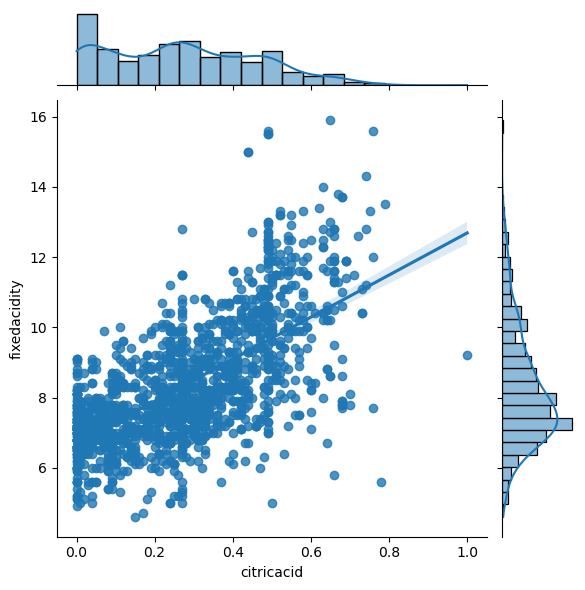

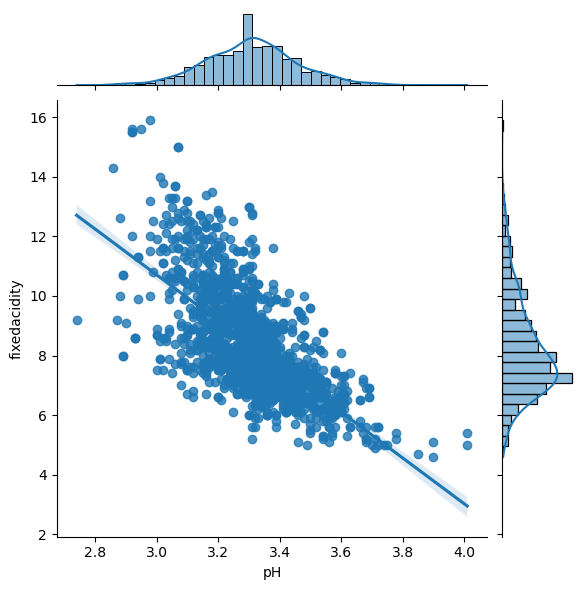

In [23]:
corr_col = ['density', 'citricacid', 'pH']

for c in corr_col:
    sns.jointplot(x = c, y = 'fixedacidity', data = data, kind = 'reg')


Veamos los mismos gráficos, pero ahora fijamos la variable pH.

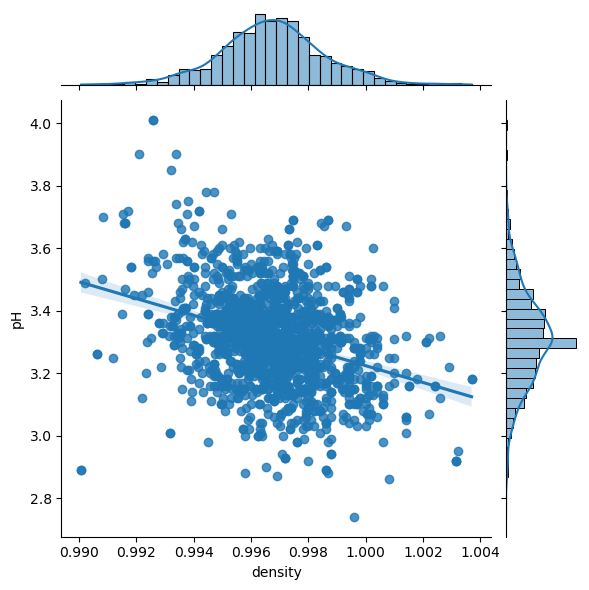

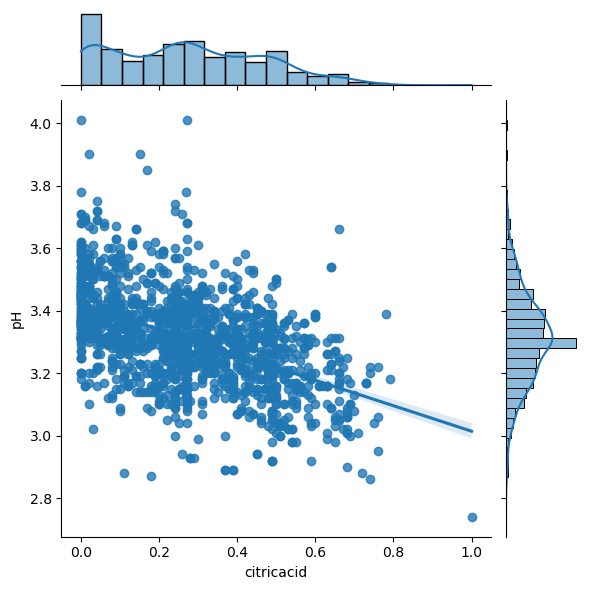

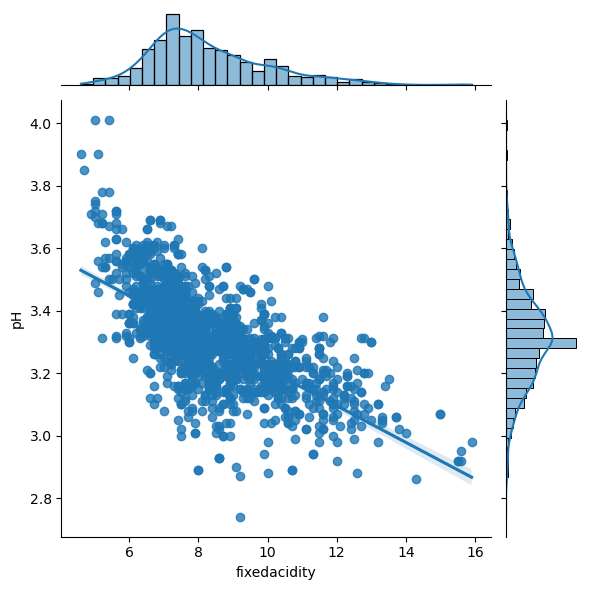

In [24]:
corr_col = ['density', 'citricacid', 'fixedacidity']

for c in corr_col:
    sns.jointplot(x = c, y = 'pH', data = data, kind = 'reg')


Vamos a crear un PairGrid para plotear histogramas, gráficos de puntos y gráficos de distribución.

In [25]:
cols

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

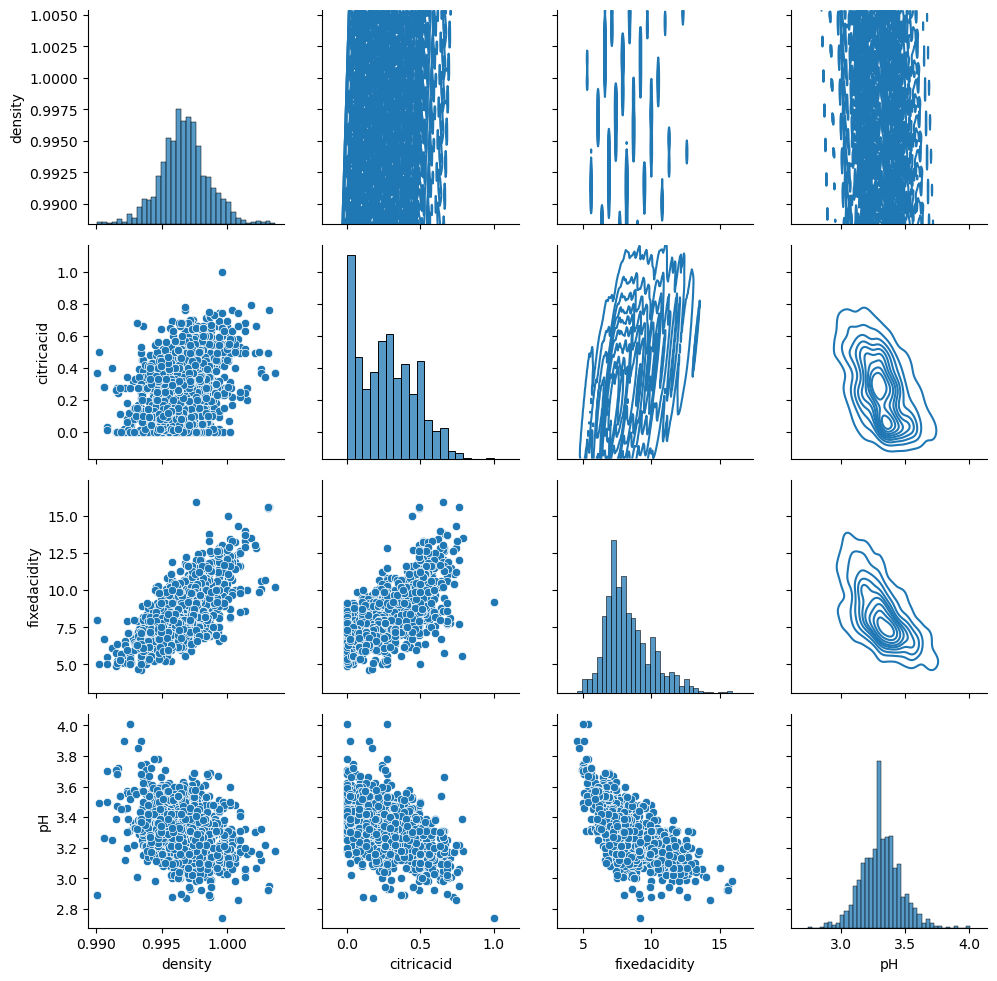

In [26]:
g = sns.PairGrid(data = data, vars = ['density', 'citricacid', 'fixedacidity', 'pH'])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

Desde mi punto de vista, dado la alta correlación y según lo que marca el regplot, podríamos prescindir de alguna de estas variables. 

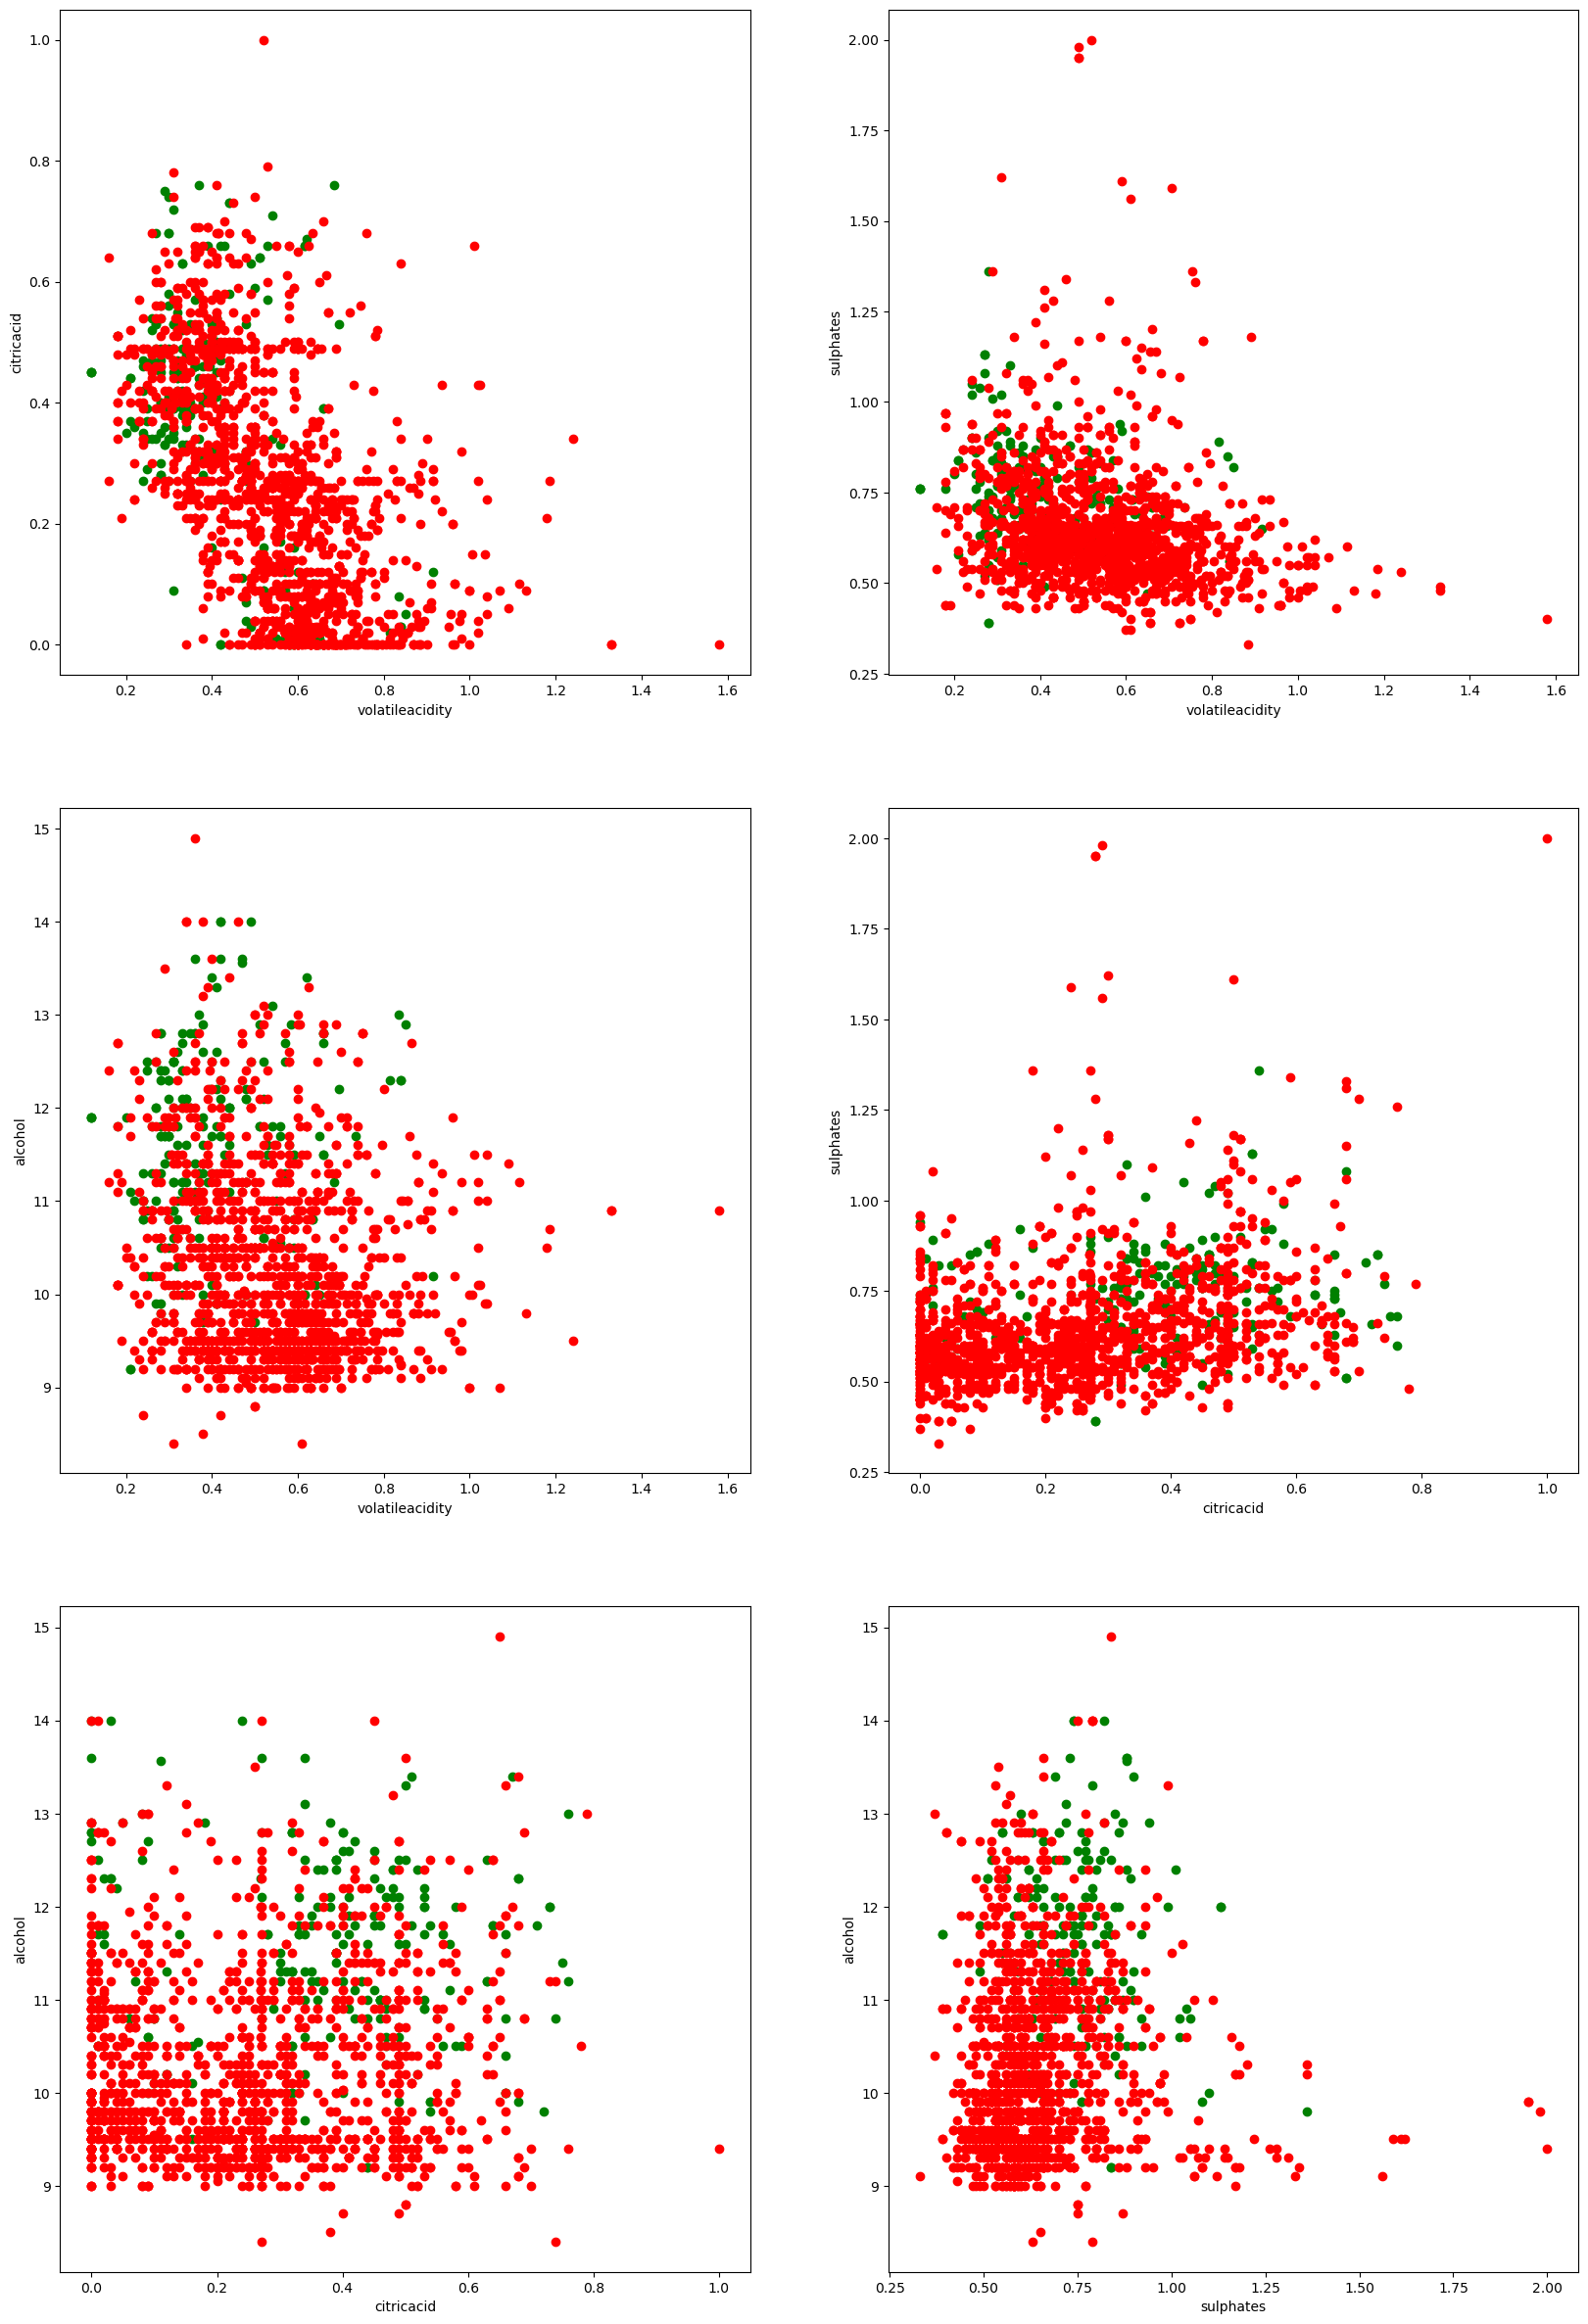

In [27]:
import itertools

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))

good = data.query('quality == 1')
bad = data.query('quality == 0')

i,j = 0,0
for comb in itertools.combinations(['volatileacidity', 'citricacid', 'sulphates', 'alcohol'], 2):
    ax[i,j].scatter(x = good[comb[0]], y = good[comb[1]], c = 'green')
    ax[i,j].scatter(x = bad[comb[0]], y = bad[comb[1]], c = 'red')
    ax[i,j].set_xlabel(comb[0])
    ax[i,j].set_ylabel(comb[1])

    j+=1
    if j==2:
        i+=1
        j=0
    

## 7. Ingeniería de variables

La ingeniería de variables, o feature engineering, consiste en la creación de nuevas variables, ya sea como combinación de las ya existentes, o incluso haciendo uso de BBDD externas. También es posible realizar una serie de transformaciones a las mismas. El objetivo de este paso es generar variables que mejoren la calidad de nuestro conjunto de datos.

In [28]:
data.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Acidez total: Suma de fixedacidity y volatileacidity**

In [29]:
data['totalacidity'] = data['fixedacidity'] + data['volatileacidity']

**Fixedsulfurdioxide: Resta de totalsulfurdioxide y freesulfurdioxide**

In [30]:
data['Fixedsulfurdioxide'] = data['totalsulfurdioxide'] - data['freesulfurdioxide']

**mso2: Variable calculada a partir de ph y freesulfurdioxide**

In [31]:
data['mso2'] = data['freesulfurdioxide'] / (1 + np.power(10, data['pH']-1.81))

In [32]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,totalacidity,Fixedsulfurdioxide,mso2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.658896,9.8,0,8.68,42.0,0.978585
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.650000,9.8,0,8.56,39.0,0.513983
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.580000,9.8,0,11.48,43.0,0.726893
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185


<Axes: >

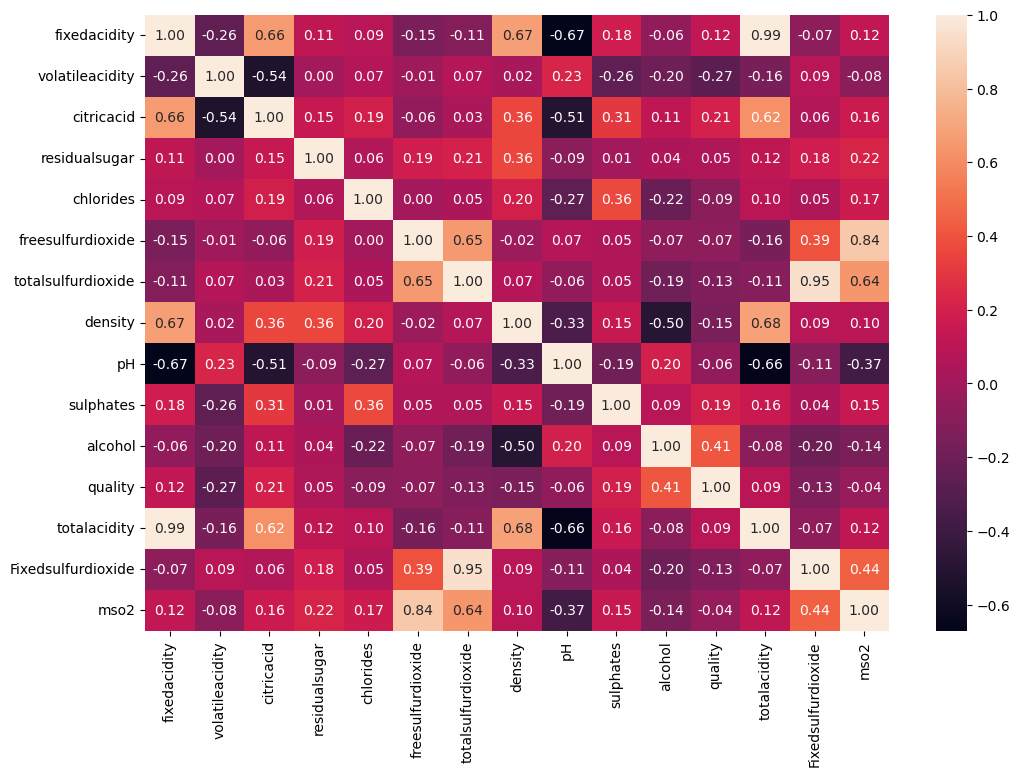

In [33]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

#### Normalización de distribuciones

Cuando trabajamos con modelos parámetricos, las distribuciones normales ayudan a tener mejores resultados. En este apartado vamos a intentar conseguir la normalidad univariante. La normalidad univariante no nos asegura la multivariante (que es la que nos gustaría conseguir), pero si ayuda.

Veamos algunos ejemplos con chlorides y freesulfurdioxide.

5.7785175034034815
43.62817604081133


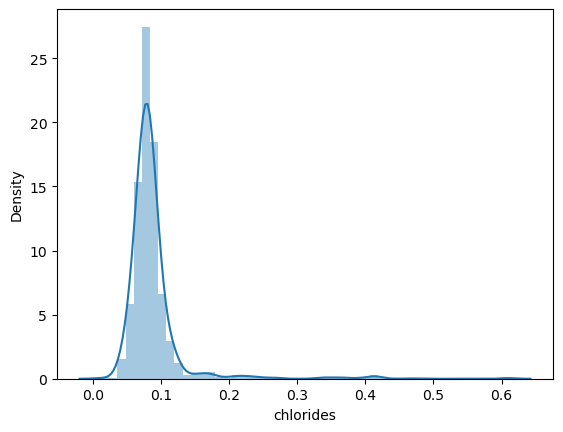

In [34]:
sns.distplot(data['chlorides'], hist = True, kde = True)
print(data['chlorides'].skew())
print(data['chlorides'].kurt())

Vamos a transformar esa variable, aplicando el logaritmo a la misma.

In [35]:
data['chlorides_log'] = np.log(data['chlorides'])

1.7248588638338684
9.733092436161924


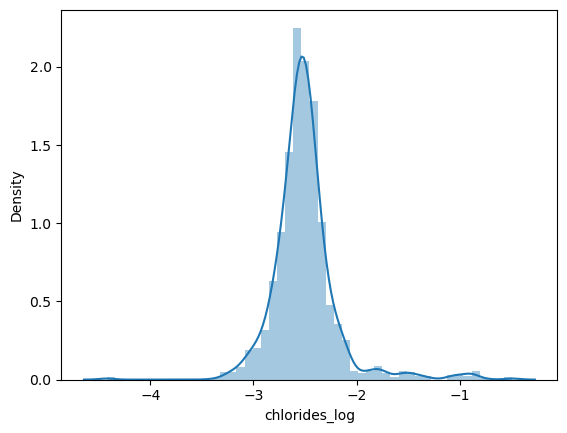

In [36]:
sns.distplot(data['chlorides_log'], hist = True, kde = True)
print(data['chlorides_log'].skew())
print(data['chlorides_log'].kurt())

¡Tachán! Podéis observar como hemos conseguido acercarnos a una distribución normal simplemente aplicando el logaritmo.

Vamos a aplicar la misma lógica a la variable freesulfuredioxide

1.250567293314441
2.023562045840575


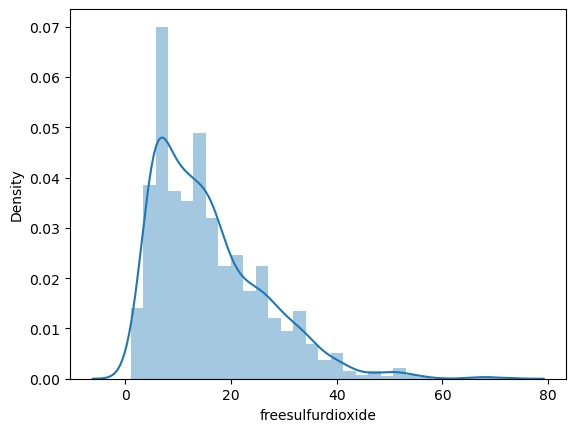

In [37]:
sns.distplot(data['freesulfurdioxide'], hist = True, kde = True)
print(data['freesulfurdioxide'].skew())
print(data['freesulfurdioxide'].kurt())

Vamos a transformar esa variable, aplicando el logaritmo a la misma.

In [38]:
data['freesulfurdioxide_log'] = np.log(data['freesulfurdioxide'])

-0.23403124715031437
-0.4620589800803274


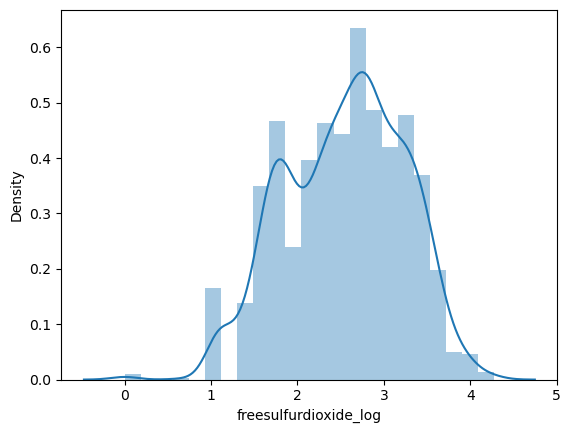

In [39]:
sns.distplot(data['freesulfurdioxide_log'], hist = True, kde = True)
print(data['freesulfurdioxide_log'].skew())
print(data['freesulfurdioxide_log'].kurt())

Podríamos aplicar esto a todas las variables **continuas** que creamos oportuno, incluyendo la variable objetivo.

<Axes: >

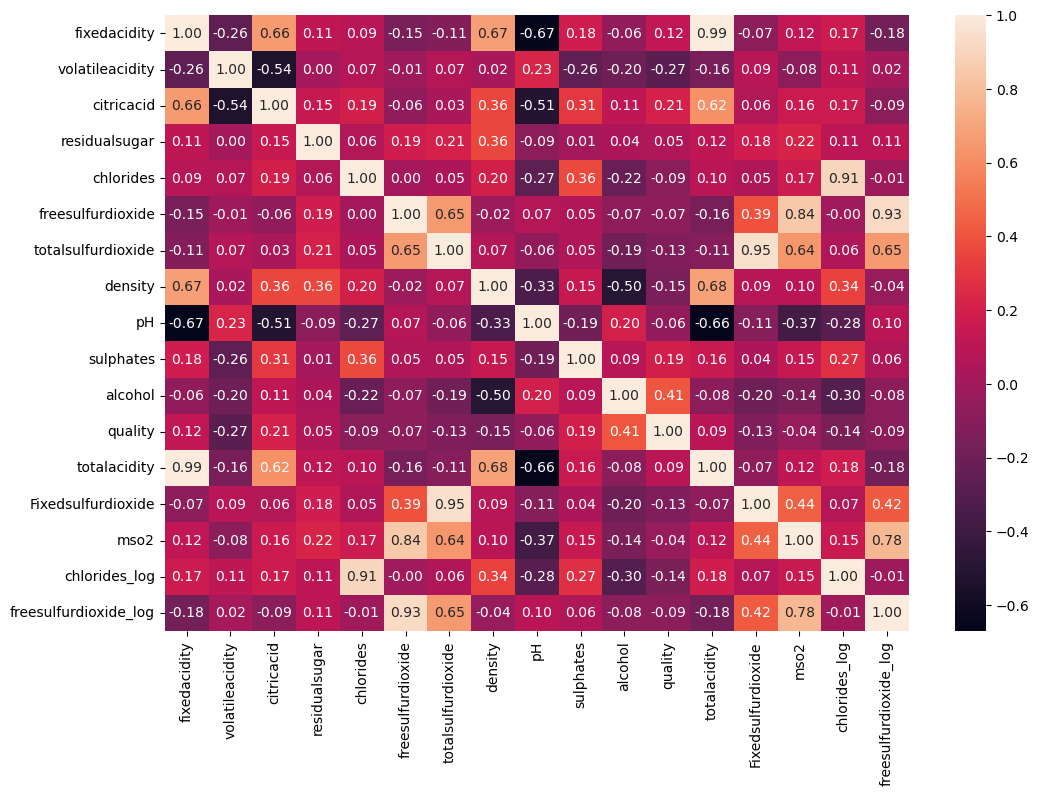

In [45]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

## 8. Importancia de variables

Para la importancia de variables hay numerosas técnicas, e incluso librerías pensadas exclusivamente para ellos. Nosotros, vamos a usar solo una de ellas.

En nuestro caso, vamos a calcular la importancia de variables haciendo uso directamente de un modelo de clasificación. Al usar un modelo basado en árboles, el propio árbol va a ser capaz de informarnos de aquellas variables que son más importantes, bien sea usando la entropía o el índice de gini.

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

In [39]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['quality'], random_state = 1234)

In [40]:
X_train = train.drop('quality', axis = 1)
y_train = train['quality']

X_test = test.drop('quality', axis = 1)
y_test = test['quality']

In [41]:
y_train.value_counts(normalize = True)

0    0.864164
1    0.135836
Name: quality, dtype: float64

In [42]:
y_test.value_counts(normalize = True)

0    0.864583
1    0.135417
Name: quality, dtype: float64

#### Basado en árbol

In [43]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1234)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [44]:
dtc.feature_importances_

array([0.        , 0.10891815, 0.        , 0.02383859, 0.        ,
       0.05819285, 0.        , 0.        , 0.07623855, 0.14795165,
       0.58486021, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [45]:
feature_importance = pd.Series(dtc.feature_importances_, index = X_train.columns)
imp = feature_importance[feature_importance > 0]
imp

volatileacidity      0.108918
residualsugar        0.023839
freesulfurdioxide    0.058193
pH                   0.076239
sulphates            0.147952
alcohol              0.584860
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

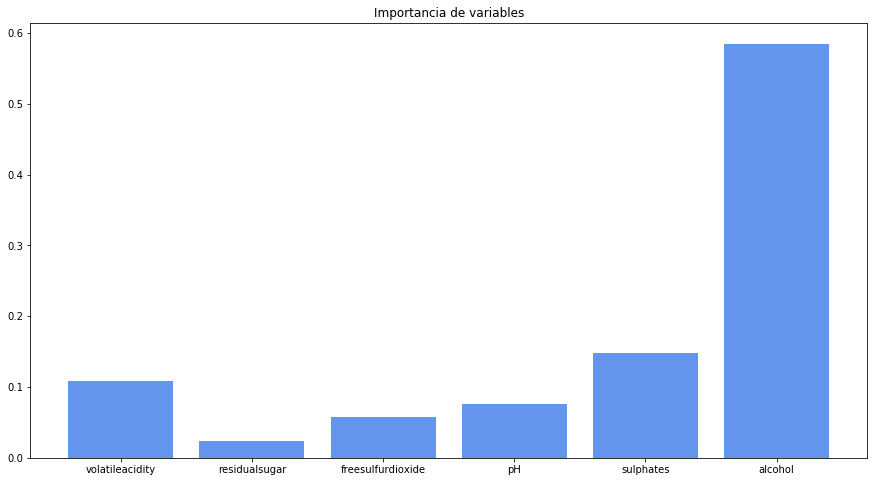

In [46]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = imp.index, height = imp.values, color = 'cornflowerblue')

ax.set_title('Importancia de variables')